In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
x=[1.752, 1.799, 1.82, 1.838, 1.897, 1.915, 1.949, 2.01, 2.062]
y=[4.998, 5.481, 5.425, 5.542, 5.792, 6.007, 6.42, 6.42, 6.934]

In [3]:
def matrix(n):
    N= len(x)
    sum_list=[]
    Y_list=[]
    matM =np.zeros((n+1,n+1))
    matY =np.zeros(n+1)
    for i in range (2*n+1):
        sum=0
        Y=0
        for j in x:
            sum+= j**i
        for k in range (0,N):
            Y+= (x[k]**i)*y[k]
        sum_list.append(sum)
        Y_list.append(Y)
    for i in range(n+1):
        for j in range(n+1):
            matM[i][j] = sum_list[j+i]
    return (matM)
 

In [4]:
def matrixY(n):
    N= len(x)
    sum_list=[]
    Y_list=[]
    matM =np.zeros((n+1,n+1))
    matY =np.zeros(n+1)
    for i in range (2*n+1):
        sum=0
        Y=0
        for j in x:
            sum+= j**i
        for k in range (0,N):
            Y+= (x[k]**i)*y[k]
        sum_list.append(sum)
        Y_list.append(Y)
    for i in range(n+1):
        matY[i]=Y_list[i]
    return(matY)

In [5]:
def Lower(n,matM,matY):
    lowerM=np.zeros((n+1,n+1))
    upperM=np.zeros((n+1,n+1))
    P=np.zeros(n+1)
    for i in range(n+1):
        for j in range(i,n+1):
            sum = 0;
            for k in range (i):
                sum+=(lowerM[i][k])*(upperM[k][j]);
            upperM[i][j]=matM[i][j]-sum;
        for j in range(i,n+1):
            if(i==j):
                lowerM[i][i]=1;
            else:
                sum = 0
                for k in range (i):
                    sum+=(lowerM[j][k])*(upperM[k][i]);
                lowerM[j][i]=(matM[j][i]-sum)/upperM[i][i];
            
    return(lowerM)
            

In [6]:
def Upper(n,matM,matY):
    lowerM=np.zeros((n+1,n+1))
    upperM=np.zeros((n+1,n+1))
    P=np.zeros(n+1)
    for i in range(n+1):
        for j in range(i,n+1):
            sum = 0;
            for k in range (i):
                sum+=(lowerM[i][k])*(upperM[k][j]);
            upperM[i][j]=matM[i][j]-sum;
        for j in range(i,n+1):
            if(i==j):
                lowerM[i][i]=1;
            else:
                sum = 0
                for k in range (i):
                    sum+=(lowerM[j][k])*(upperM[k][i]);
                lowerM[j][i]=(matM[j][i]-sum)/upperM[i][i];
            
    return(upperM)

In [7]:
def YmatrixLU(n,matY,lowerM):
    P=np.zeros(n+1)
    for i in range (n+1):
        P[i]=matY[i]/lowerM[i][i];
        for j in range(0,i):
            P[i]=P[i]-(lowerM[i][j]*P[j])/lowerM[i][i];
    return(P)

In [8]:
def finalmatrix(n,P,upperM):
    matA = np.zeros(n+1)
    for i in range (n,-1,-1):
        matA[i]=P[i]/upperM[i][i];
        for j in range (i+1, n+1):
            matA[i]=matA[i]-(upperM[i][j]*matA[j])/upperM[i][i];
    return(matA)

In [9]:
M1=matrix(1)
print(M1)
Y1=matrixY(1)
print(Y1)

[[ 9.       17.042   ]
 [17.042    32.352928]]
[ 53.019    100.882028]


In [10]:
A1=np.zeros(1)
L1=Lower(1,M1,Y1)
U1=Upper(1,M1,Y1)
P1=YmatrixLU(1,Y1,L1)
A1=finalmatrix(1,P1,U1)
print(A1)

[-5.23934425  5.87801304]


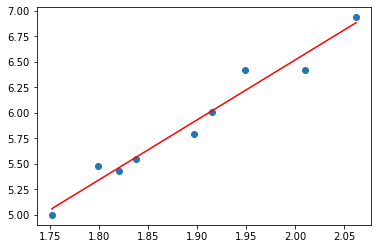

In [11]:
delx=(x[-1] - x[0])/100
delx1=x[0]
X=[delx1]
for i in range (0,100,1):
    delx1+=delx
    X.append(delx1)
F1 = [A1[0]+(A1[1]*xi) for xi in X]
plt.plot(x, y, 'o')
plt.plot(X, F1, 'r')

In [12]:
N=len(x)

In [13]:
D1=0
S1=0
for i in range (0,N):
    D1+= y[i]-F1[i]
    S1+=(y[i]-F1[i])**2
print(D1)
print(S1)
    

6.832602358463311
7.708026843570817


In [14]:
M2=matrix(2)
print(M2)
Y2=matrixY(2)
print(Y2)

[[  9.          17.042       32.352928  ]
 [ 17.042       32.352928    61.5785107 ]
 [ 32.352928    61.5785107  117.50915343]]
[ 53.019      100.882028   192.45100374]


In [15]:
A2=np.zeros(2)
L2=Lower(2,M2,Y2)
U2=Upper(2,M2,Y2)
P2=YmatrixLU(2,Y2,L2)
A2=finalmatrix(2,P2,U2)
print(A2)

[-6.06859493  6.74980272 -0.22853522]


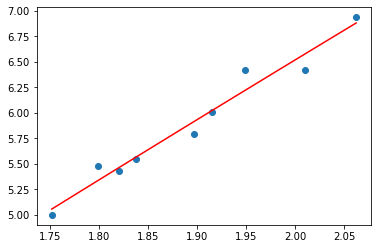

In [16]:
F2 = [A2[0]+(A2[1]*xi)+(A2[2]*(xi**2)) for xi in X]
plt.plot(x, y, 'o')
plt.plot(X, F2, 'r')

In [17]:
D2=0
S2=0
for i in range (0,N):
    D2+= y[i]-F2[i]
    S2+=(y[i]-F2[i])**2
print(D2)
print(S2)
    

6.8554110006011815
7.7379045037414365


In [18]:
M3=matrix(3)
print(M3)
Y3=matrixY(3)
print(Y3)
A3=np.zeros(3)
L3=Lower(3,M3,Y3)
U3=Upper(3,M3,Y3)
P3=YmatrixLU(3,Y3,L3)
A3=finalmatrix(3,P3,U3)
print(A3)

[[  9.          17.042       32.352928    61.5785107 ]
 [ 17.042       32.352928    61.5785107  117.50915343]
 [ 32.352928    61.5785107  117.50915343 224.8237639 ]
 [ 61.5785107  117.50915343 224.8237639  431.25930626]]
[ 53.019      100.882028   192.45100374 368.08853165]
[-170.25961366  265.91125262 -136.3627783    23.79776788]


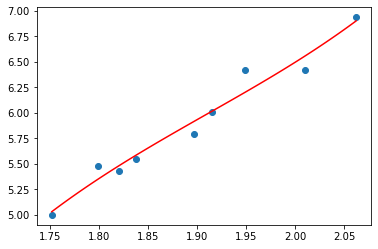

In [19]:
F3 = [A3[0]+(A3[1]*xi)+(A3[2]*(xi**2))+(A3[3]*(xi**3)) for xi in X]
plt.plot(x, y, 'o')
plt.plot(X, F3, 'r')

In [20]:
D3=0
S3=0
for i in range (0,N):
    D3+= y[i]-F3[i]
    S3+=(y[i]-F3[i])**2
print(D3)
print(S3)

6.96464264680396
7.830964799106006


In [21]:
M4=matrix(4)
print(M4)
Y4=matrixY(4)
print(Y4)
A4=np.zeros(4)
L4=Lower(4,M4,Y4)
U4=Upper(4,M4,Y4)
P4=YmatrixLU(4,Y4,L4)
A4=finalmatrix(4,P4,U4)
print(A4)

[[   9.           17.042        32.352928     61.5785107   117.50915343]
 [  17.042        32.352928     61.5785107   117.50915343  224.8237639 ]
 [  32.352928     61.5785107   117.50915343  224.8237639   431.25930626]
 [  61.5785107   117.50915343  224.8237639   431.25930626  829.38262067]
 [ 117.50915343  224.8237639   431.25930626  829.38262067 1599.12624492]]
[ 53.019      100.882028   192.45100374 368.08853165 705.84353528]
[  671.87798749 -1510.96616546  1267.96833667  -468.9257876
    64.75466473]


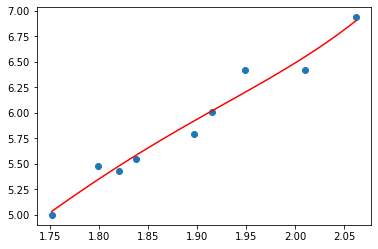

In [22]:
F4 = [A4[0]+(A4[1]*xi)+(A4[2]*(xi**2))+(A4[3]*(xi**3))+(A4[4]*(xi**4)) for xi in X]
plt.plot(x, y, 'o')
plt.plot(X, F4, 'r')

In [23]:
D4=0
S4=0
for i in range (0,N):
    D4+= y[i]-F4[i]
    S4+=(y[i]-F4[i])**2
print(D4)
print(S4)

6.971252209368111
7.859219975370845


In [24]:
M5=matrix(5)
print(M5)
Y5=matrixY(5)
print(Y5)
A5=np.zeros(5)
L5=Lower(5,M5,Y5)
U5=Upper(5,M5,Y5)
P5=YmatrixLU(5,Y5,L5)
A5=finalmatrix(5,P5,U5)
print(A5)

[[   9.           17.042        32.352928     61.5785107   117.50915343
   224.8237639 ]
 [  17.042        32.352928     61.5785107   117.50915343  224.8237639
   431.25930626]
 [  32.352928     61.5785107   117.50915343  224.8237639   431.25930626
   829.38262067]
 [  61.5785107   117.50915343  224.8237639   431.25930626  829.38262067
  1599.12624492]
 [ 117.50915343  224.8237639   431.25930626  829.38262067 1599.12624492
  3091.07810075]
 [ 224.8237639   431.25930626  829.38262067 1599.12624492 3091.07810075
  5989.92865209]]
[  53.019       100.882028    192.45100374  368.08853165  705.84353528
 1357.01192607]
[ -4906335.59409538  12902114.88954055 -13559621.3728826
   7119150.21062968  -1867254.51253864    195733.37884037]


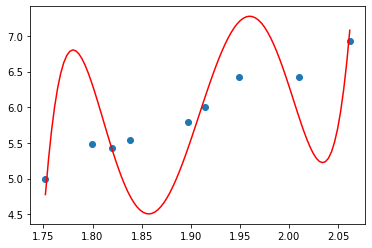

In [25]:
F5 = [A5[0]+(A5[1]*xi)+(A5[2]*(xi**2))+(A5[3]*(xi**3))+(A5[4]*(xi**4))+(A5[5]*(xi**5)) for xi in X]
plt.plot(x, y, 'o')
plt.plot(X, F5, 'r')

In [26]:
D5=0
S5=0
for i in range (0,N):
    D5+= y[i]-F5[i]
    S5+=(y[i]-F5[i])**2
print(D5)
print(S5)

-1.5615841684341438
0.9647099714289976
